In [200]:
from math import pi
import matplotlib.pyplot as plt
from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now

In [201]:
num_qubits=1
dev=qml.device('default.qubit', wires=num_qubits)
seed = 40
np.random.seed(seed)

In [202]:
t=np.linspace(0,10, 20)

In [203]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x,theta):
    qml.QubitStateVector(encoded_x,wires=[0])
    qml.RY(wires=0,phi=theta)
    return qml.probs(wires=[0])

In [204]:
def encoder(x):
    # vector_x = [x,x**2]
    # vector_x = [x+x**2,1+x**3]
    vector_x = [x+x**2,1+x**3]
    norm_x = np.linalg.norm(vector_x)
    # print(vector_x)
    return vector_x/norm_x , norm_x

In [205]:

def f(x,theta,w):
    encoded_x,norm_x = encoder(x)
    f_val = hepler(encoded_x,theta)
    # rescale_coef = abs(w[0])
    rescale_coef = w[0]
    return (f_val[1]*(norm_x**2))*rescale_coef+w[1]
    # print(qml.draw(hepler)(encoded_x))

In [206]:
# f(-1.7)

In [207]:
def f_test(t):
    return -0.5*t**6+10*t**5+4*t**3+5*t**2+20*t-10

In [208]:
def callbackF(parameters):
    # global current_loss

    print("Current loss:", cost(parameters)) 


def cost(params):
    global theta
    global w
    # Reshape the flattened theta back to its original shape
    theta_shape = theta.shape
    w_shape = w.shape
    w, theta_flat = params[:2], params[2:]
    theta = theta_flat.reshape(theta_shape)
    loss = 0
    for x in t:
        loss += (f(x,theta[0],w)-f_test(x))**2/len(t)
    
    # print(w)
    # print(theta)
    # raise KeyError
    return loss

In [209]:
import numpy as np
from scipy.optimize import minimize



theta = np.random.uniform(0, 2 * np.pi, size=(1))
w = np.zeros(2)

initial_params = np.concatenate([w, theta.flatten()])  # Flatten theta to a 1D array

result = minimize(cost, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})
# Extract the optimized parameters
w, theta_flat = result.x[:2], result.x[2:]
theta = theta_flat.reshape(theta.shape)

Current loss: 17051539484.843864
Current loss: 3686773744.649892
Current loss: 813473921.5198537
Current loss: 340863442.35567355
Current loss: 320885892.3370329
Current loss: 320190725.6920765
Current loss: 320017941.35909504
Current loss: 319802427.6852535
Current loss: 319404752.1785611
Current loss: 318660315.26390016
Current loss: 317271306.35671574
Current loss: 314809821.01296186
Current loss: 311403665.7225654
Current loss: 308114628.038759
Current loss: 302302976.5034565
Current loss: 292284258.14084166
Current loss: 277341666.4148254
Current loss: 269868463.9887689
Current loss: 258572745.16891092
Current loss: 255925026.2644571
Current loss: 251399033.51412275
Current loss: 244725771.29894632
Current loss: 239453120.22013032
Current loss: 232081882.90248376
Current loss: 222148370.3335628
Current loss: 207210186.4802254
Current loss: 199098496.4497447
Current loss: 186252866.4633276
Current loss: 183688799.98064446
Current loss: 179066270.247482
Current loss: 171370468.88280

In [210]:
print(w)

[   26.18157438 -2387.79936705]


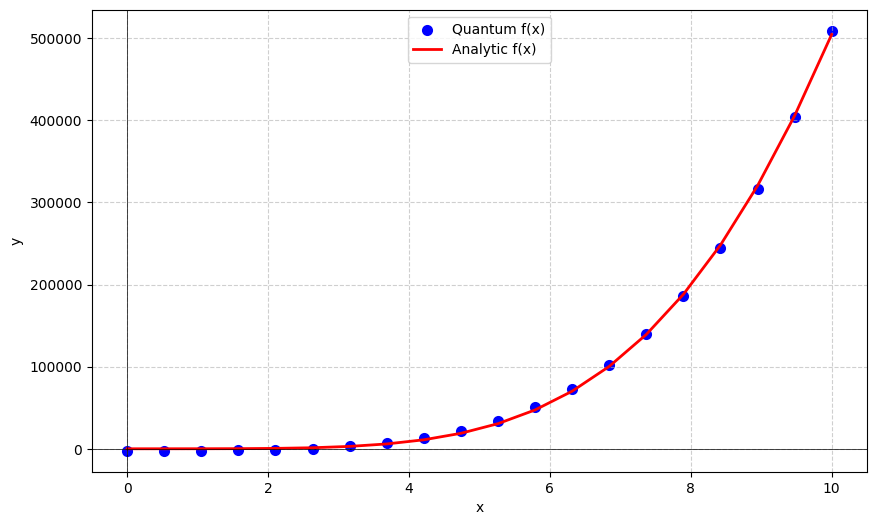

In [211]:

# Calculate corresponding y values for both functions
y1 = [f(x,theta[0],w) for x in t]
y2 = [f_test(x) for x in t]


# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(t, y1, label='Quantum f(x)', linewidth=2, color='b')  # Plot the first function
plt.plot(t, y2, label='Analytic f(x)', linewidth=2, color='r')  # Plot the second function
plt.xlabel('x')  # X-axis label
plt.ylabel('y')  # Y-axis label
# plt.title('Plot of Two Functions')  # Title of the plot
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid
plt.legend()  # Show the legend
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0
# plt.ylim([-5, 10])  # Set y-axis limits
